In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fb_stock_data = pd.read_csv('FB2ABE.csv')
fb_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-29,67.300003,67.980003,65.690002,67.029999,67.029999,1716
1,2015-01-30,69.269997,69.269997,68.889999,68.889999,68.889999,560
2,2015-02-02,67.639999,67.639999,66.000000,66.070000,66.070000,429
3,2015-02-03,66.339996,66.500000,66.269997,66.470001,66.470001,128
4,2015-02-04,65.309998,66.089996,65.309998,66.089996,66.089996,230


In [4]:
fb_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1777 non-null   object 
 1   Open       1777 non-null   float64
 2   High       1777 non-null   float64
 3   Low        1777 non-null   float64
 4   Close      1777 non-null   float64
 5   Adj Close  1777 non-null   float64
 6   Volume     1777 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 97.3+ KB


In [5]:
fb_stock_data = fb_stock_data[['Date','Open','Close']] # Extracting required columns
fb_stock_data['Date'] = pd.to_datetime(fb_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
fb_stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
fb_stock_data.head()

,Open,Close
Date,,
2015-01-29,67.300003,67.029999
2015-01-30,69.269997,68.889999
2015-02-02,67.639999,66.070000
2015-02-03,66.339996,66.470001
2015-02-04,65.309998,66.089996


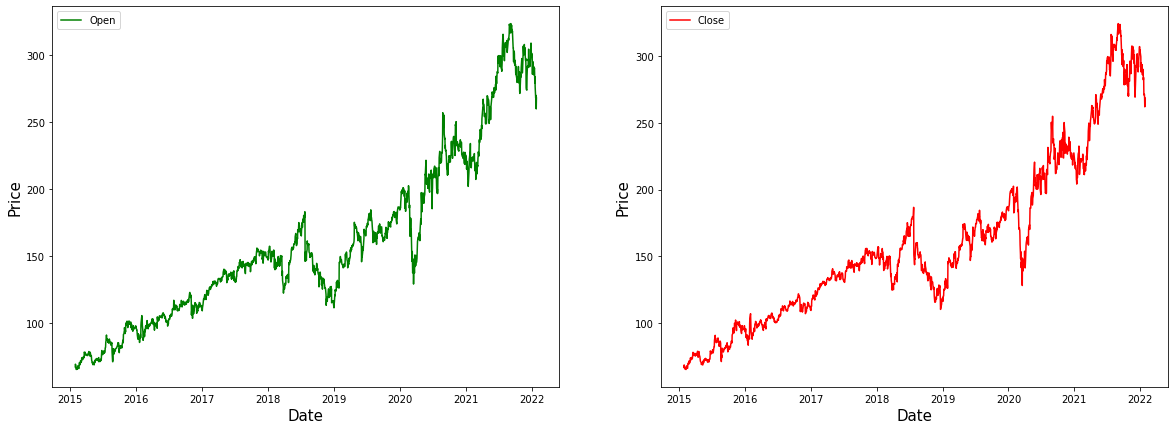

In [6]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(fb_stock_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(fb_stock_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Data Pre-Processing

In [7]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
fb_stock_data[fb_stock_data.columns] = MMS.fit_transform(fb_stock_data)

In [8]:
fb_stock_data.shape

(1777, 2)

In [9]:
training_size = round(len(fb_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1422

In [10]:
train_data = fb_stock_data[:training_size]
test_data  = fb_stock_data[training_size:]

train_data.shape, test_data.shape

((1422, 2), (355, 2))

In [11]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [12]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [13]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1372, 50, 2), (1372, 2), (305, 50, 2), (305, 2))

# Creating LSTM model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
43/43 [==============================] - 18s 154ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 2/100
43/43 [==============================] - 5s 115ms/step - loss: 8.3199e-04 - mean_squared_error: 8.3199e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/100
43/43 [==============================] - 4s 92ms/step - loss: 7.4838e-04 - mean_squared_error: 7.4838e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 4/100
43/43 [==============================] - 4s 92ms/step - loss: 7.0396e-04 - mean_squared_error: 7.0396e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/100
43/43 [==============================] - 4s 82ms/step - loss: 6.6515e-04 - mean_squared_error: 6.6515e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/100
43/43 [==============================] - 4s 99ms/step - loss: 6.6677e-04 - mean_squared_error: 6.6677e-04 - val_loss: 0.0017 - val_mean_squared

Epoch 48/100
43/43 [==============================] - 5s 117ms/step - loss: 2.5449e-04 - mean_squared_error: 2.5449e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 49/100
43/43 [==============================] - 4s 102ms/step - loss: 3.3353e-04 - mean_squared_error: 3.3353e-04 - val_loss: 6.8945e-04 - val_mean_squared_error: 6.8945e-04
Epoch 50/100
43/43 [==============================] - 4s 102ms/step - loss: 2.6075e-04 - mean_squared_error: 2.6075e-04 - val_loss: 4.3625e-04 - val_mean_squared_error: 4.3625e-04
Epoch 51/100
43/43 [==============================] - 4s 86ms/step - loss: 2.5335e-04 - mean_squared_error: 2.5335e-04 - val_loss: 7.0551e-04 - val_mean_squared_error: 7.0551e-04
Epoch 52/100
43/43 [==============================] - 3s 78ms/step - loss: 2.6482e-04 - mean_squared_error: 2.6482e-04 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 53/100
43/43 [==============================] - 5s 126ms/step - loss: 2.7689e-04 - mean_squared_error: 2.7689e-0

43/43 [==============================] - 6s 130ms/step - loss: 1.7265e-04 - mean_squared_error: 1.7265e-04 - val_loss: 4.1585e-04 - val_mean_squared_error: 4.1585e-04
Epoch 95/100
43/43 [==============================] - 5s 122ms/step - loss: 1.7830e-04 - mean_squared_error: 1.7830e-04 - val_loss: 2.5949e-04 - val_mean_squared_error: 2.5949e-04
Epoch 96/100
43/43 [==============================] - 3s 79ms/step - loss: 1.8947e-04 - mean_squared_error: 1.8947e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 97/100
43/43 [==============================] - 3s 76ms/step - loss: 1.7770e-04 - mean_squared_error: 1.7770e-04 - val_loss: 4.7326e-04 - val_mean_squared_error: 4.7326e-04
Epoch 98/100
43/43 [==============================] - 3s 79ms/step - loss: 1.7104e-04 - mean_squared_error: 1.7104e-04 - val_loss: 2.9274e-04 - val_mean_squared_error: 2.9274e-04
Epoch 99/100
43/43 [==============================] - 5s 113ms/step - loss: 1.6264e-04 - mean_squared_error: 1.6264e-04 - va

In [20]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.6609422 , 0.6639119 ],
       [0.6567055 , 0.6597425 ],
       [0.64725626, 0.65023094],
       [0.64153665, 0.64455944],
       [0.6388753 , 0.64199334]], dtype=float32)

In [21]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[235.99171, 237.17416],
       [234.89763, 236.0958 ],
       [232.45746, 233.63573],
       [230.98042, 232.16885],
       [230.29315, 231.50516]], dtype=float32)

# Visualizing predicted and actual data

In [22]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([fb_stock_data.iloc[-305:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=fb_stock_data.iloc[-305:].index)], axis=1)

In [23]:
gs_slic_data[['Open','Close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling

In [24]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2020-11-17,233.899994,233.199997,235.991714,237.174164
2020-11-18,231.199997,231.100006,234.897629,236.095795
2020-11-19,230.050003,229.600006,232.457458,233.635727
2020-11-20,229.100006,229.149994,230.980423,232.168854
2020-11-23,228.899994,226.500000,230.293152,231.505157


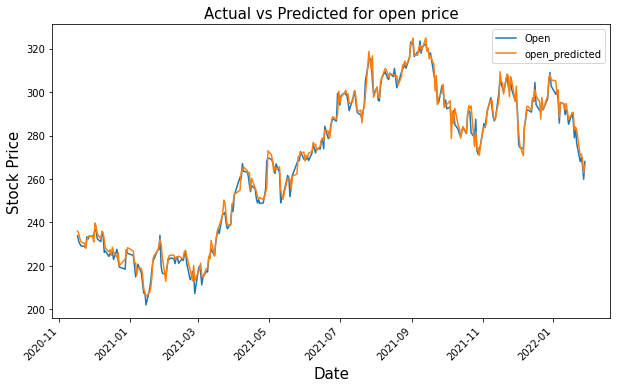

In [25]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

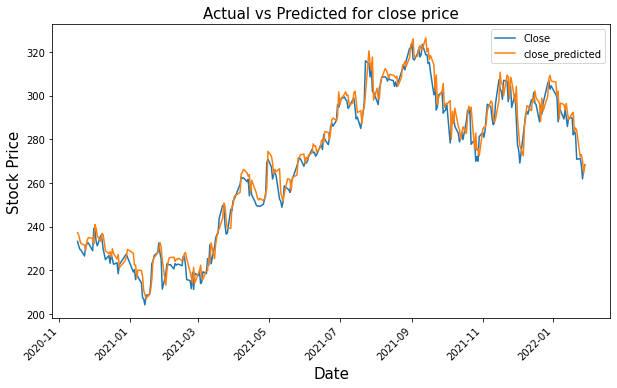

In [26]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Predicting upcoming 10 days

In [27]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [28]:
gs_slic_data['2022-01-23':'2022-01-28']

,Open,Close,open_predicted,close_predicted
2022-01-24,268.000000,271.200012,270.676849,271.987427
2022-01-25,270.000000,268.299988,271.436859,272.956970
2022-01-26,266.100006,261.850006,268.675049,270.246674
2022-01-27,259.850006,266.450012,262.916412,264.502899
2022-01-28,268.000000,268.350006,266.282349,268.018829


In [29]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [30]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)


In [31]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

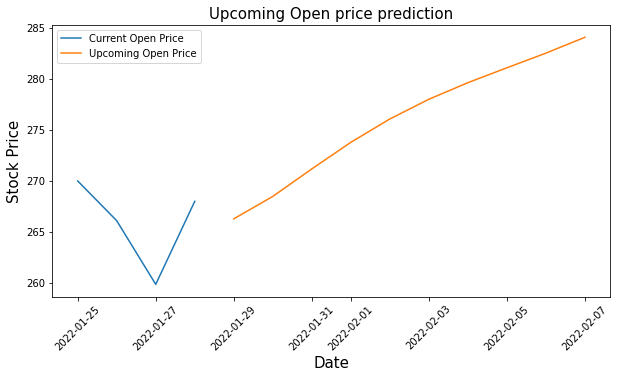

In [32]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2022-01-25':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2022-01-25':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

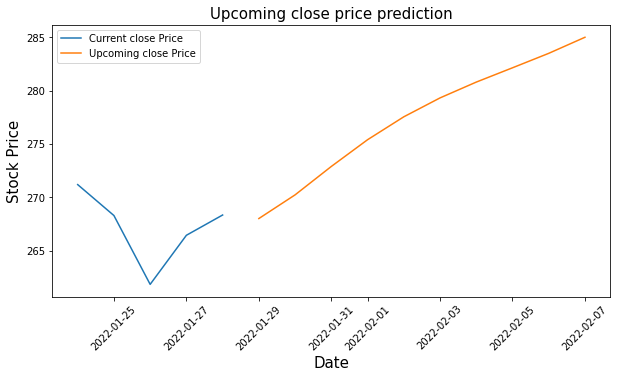

In [33]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2022-01-24':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()